In [1]:
import pickle
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from dist_rsa.models.debugging.l1_discrete import l1_model
%matplotlib inline


/Users/reuben/py3/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)


In [7]:
def titrate(size,amount,l1_sig1,quds,only_trivial,pred,just_s1,possible_utterances,discrete=True,just_l0=False,sig1=0.1,sig2=0.1):
    results = l1_model(subj="subj1",
                             pred=pred,
                             sig1=sig1,
                             sig2=sig2,
                             l1_sig1=l1_sig1,
                             resolution=(size,amount),
                             quds=quds,
                             only_trivial=only_trivial,
                             just_s1=just_s1,
                             just_l0=just_l0,
                             possible_utterances=possible_utterances,
                             discrete=discrete,
                            )


#     n=np.asarray([1 if x[1]==3 or x[0]==3 else 0 for x in results[1]])
# #     print(results[0].shape)
# #     print(n.shape)
#     print("\n\n\nRESULTS\n\n\n")
#     print(n)
#     n=np.reshape(n,(size*2,size*2))
    
#     hm = pnd.DataFrame(n,columns=np.arange(-size,size)*amount,index=np.arange(-size,size)*amount)
#     seaborn.heatmap(hm)
    
#     return None

    if discrete:
        if not just_s1:
            print("QUDS: ", list(zip(quds,np.exp(results[-1]))))
        hm = pnd.DataFrame((results[0]),columns=np.arange(-size,size)*amount,index=np.arange(-size,size)*amount)
#         print(hm)

        seaborn.heatmap(hm)
    
    else: print("QUDS",[(x,np.exp(y)) for (x,y) in results[-1]])
#         results[0][size,:]=0.75
#         results[0][:,size]=0.75
#         results[0][size,size+3]=2
#         results[0][size,size+1]=2




UTTERANCES:
 ['shark', 'swimmer']
subject: ['subj1']
predicate shark
SIGs 1&2: 1.0 1.0
L1 SIG 1.0
step_size 0.1
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 2
(2, 2, 2) (2, 1, 2)
2
QUDS:  [('vicious', 0.47948915), ('swims', 0.52033067)]


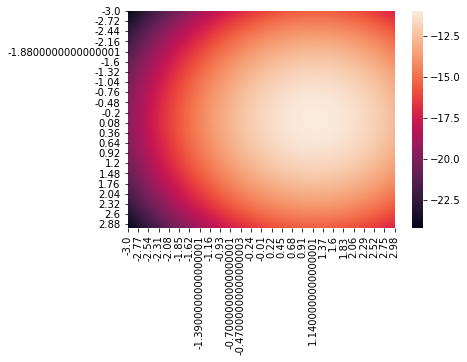

In [13]:
titrate(size=300,amount=0.01,l1_sig1=1.0,quds=['vicious',"swims"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=1.0)

UTTERANCES:
 ['shark', 'swimmer', 'man']
subject: ['subj1']
predicate shark
SIGs 1&2: 1.0 1.0
L1 SIG 1.0
step_size 0.1
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 3 possible utterances and 1
(1, 3, 2) (1, 1, 2)
2


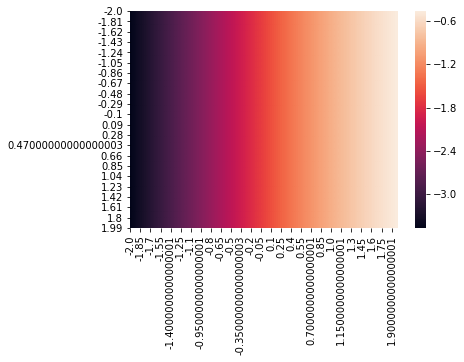

In [10]:
titrate(size=200,amount=0.01,l1_sig1=1.0,quds=['vicious'],possible_utterances=["shark","swimmer","man"],pred='shark',only_trivial=False,just_s1=True,just_l0=False,sig1=1.0,sig2=1.0)

UTTERANCES:
 ['shark', 'swimmer', 'man']
subject: ['subj1']
predicate shark
SIGs 1&2: 1.0 1.0
L1 SIG 1.0
step_size 0.1
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 3 possible utterances and 1
(1, 3, 2) (1, 1, 2)
2


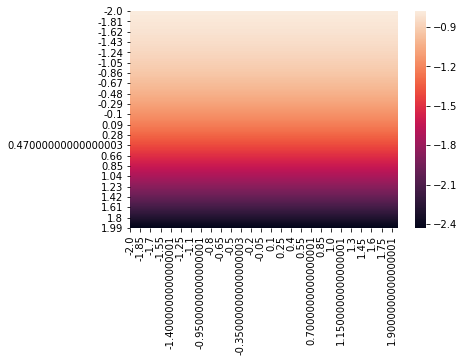

In [11]:
titrate(size=200,amount=0.01,l1_sig1=1.0,quds=['swims'],possible_utterances=["shark","swimmer","man"],pred='shark',only_trivial=False,just_s1=True,just_l0=False,sig1=1.0,sig2=1.0)

In [25]:
titrate(size=100,amount=0.05,l1_sig1=1.0,quds=['vicious',"swims"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=1.0,discrete=False)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['subj1']
predicate shark
SIGs 1&2: 1.0 1.0
L1 SIG 1.0
step_size 0.1
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 2
is baseline? False
RUNNING CAT WITHOUT TRIVIAL MODEL
qud_combinations 2
quds 2
(2, 2, 2) (2, 1, 2)
length poss utts and l_summed 2 (2,)
QWORLD SHAPE (2,)
100/100 [100%] ██████████████████████████████ Elapsed: 2s | Loss: 4.198
(2, 2, 2) (2, 1, 2)
(2, 2, 2) (2, 1, 2)
inferred_qud shape (2000, 2, 2)
TIME OF DEMARGINALIZATION 0.5186371803283691
QUDS [(['vicious'], 0.5503022), (['swims'], 0.44969842)]


UTTERANCES:
 ['shark', 'swimmer']
subject: ['subj1']
predicate shark
SIGs 1&2: 1.0 1.0
L1 SIG 1.0
step_size 0.1
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 2
(2, 2, 2) (2, 1, 2)
2
QUDS:  [('vicious', 0.4755101), ('swims', 0.52446693)]


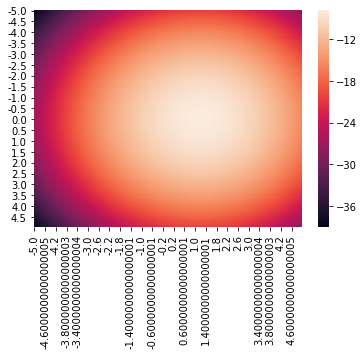

In [5]:
titrate(discrete=False,size=100,amount=0.05,l1_sig1=1.0,quds=['vicious',"swims"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=1.0,prior=False)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['subj1']
predicate shark
SIGs 1&2: 1.0 1.0
L1 SIG 1.0
step_size 0.1
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 2
(2, 2, 2) (2, 1, 2)
2
QUDS:  [('vicious', 0.59806275), ('swims', 0.401937)]


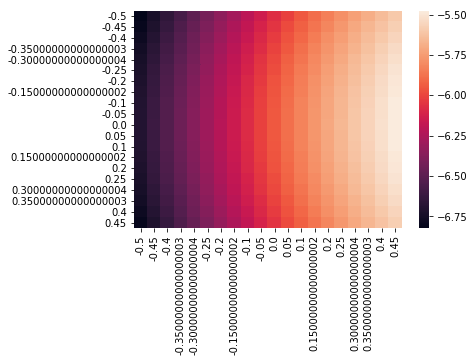

In [6]:
titrate(size=10,amount=0.05,l1_sig1=1.0,quds=['vicious',"swims"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=1.0,prior=False)

UTTERANCES:
 ['shark', 'swimmer']
subject: ['subj1']
predicate shark
SIGs 1&2: 1.0 1.0
L1 SIG 1.0
step_size 0.1
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 2
(2, 2, 2) (2, 1, 2)
2
QUDS:  [('vicious', 0.47551438), ('swims', 0.5244856)]


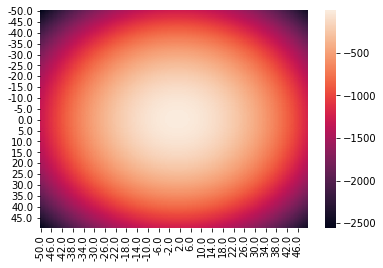

In [7]:
titrate(size=100,amount=0.5,l1_sig1=1.0,quds=['vicious',"swims"],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=1.0,prior=False)

UTTERANCES:
 ['shark', 'fish', 'man']
subject: ['subj1']
predicate fish
SIGs 1&2: 2.0 2.0
L1 SIG 10.0
step_size 0.1
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 3 possible utterances and 2
FOO
DOUBLE FOO
(2, 3, 2) (2, 1, 2)
4
QUDS:  [('vicious', 0.3901909), ('swims', 0.6098094)]


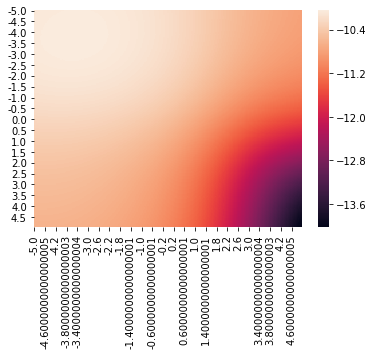

In [15]:
titrate(size=100,amount=0.05,l1_sig1=10.0,quds=['vicious',"swims"],possible_utterances=["shark","fish","man"],pred='fish',only_trivial=False,just_s1=False,just_l0=False,sig1=2.0,sig2=2.0,prior=False)

UTTERANCES:
 ['shark', 'fish']
subject: ['subj1']
predicate shark
SIGs 1&2: 2.0 2.0
L1 SIG 10.0
step_size 0.1
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 2
FOO
DOUBLE FOO
(2, 2, 2) (2, 1, 2)
4
QUDS:  [('vicious', 0.5130846), ('swims', 0.48691556)]


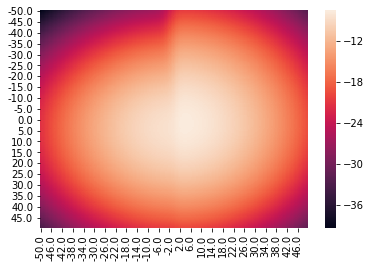

In [18]:
titrate(size=100,amount=0.5,l1_sig1=10.0,quds=['vicious',"swims"],possible_utterances=["shark","fish"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=2.0,sig2=2.0,prior=False)

UTTERANCES:
 ['shark', 'fish']
subject: ['subj1']
predicate fish
SIGs 1&2: 2.0 2.0
L1 SIG 10.0
step_size 0.1
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 2 possible utterances and 2
FOO
DOUBLE FOO
(2, 2, 2) (2, 1, 2)
4
QUDS:  [('vicious', 0.4868942), ('swims', 0.51310563)]


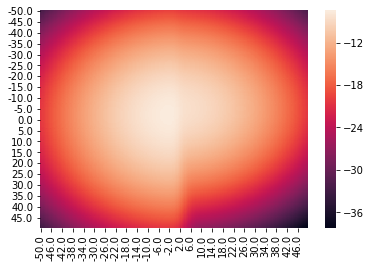

In [19]:
titrate(size=100,amount=0.5,l1_sig1=10.0,quds=['vicious',"swims"],possible_utterances=["shark","fish"],pred='fish',only_trivial=False,just_s1=False,just_l0=False,sig1=2.0,sig2=2.0,prior=False)

UTTERANCES:
 ['shark', 'fish', 'man']
subject: ['subj1']
predicate shark
SIGs 1&2: 2.0 2.0
L1 SIG 10.0
step_size 0.1
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 3 possible utterances and 2
FOO
DOUBLE FOO
(2, 3, 2) (2, 1, 2)
4
QUDS:  [('vicious', 0.1195329), ('swims', 0.88046676)]


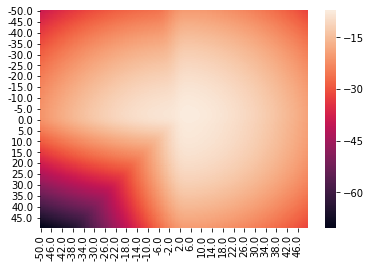

In [20]:
titrate(size=100,amount=0.5,l1_sig1=10.0,quds=['vicious',"swims"],possible_utterances=["shark","fish","man"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=2.0,sig2=2.0,prior=False)

UTTERANCES:
 ['shark', 'fish', 'man']
subject: ['subj1']
predicate fish
SIGs 1&2: 2.0 2.0
L1 SIG 10.0
step_size 0.1
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 3 possible utterances and 2
FOO
DOUBLE FOO
(2, 3, 2) (2, 1, 2)
4
QUDS:  [('vicious', 0.47533825), ('swims', 0.5246618)]


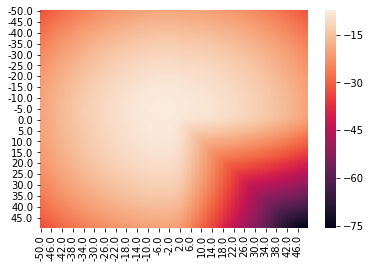

In [21]:
titrate(size=100,amount=0.5,l1_sig1=10.0,quds=['vicious',"swims"],possible_utterances=["shark","fish","man"],pred='fish',only_trivial=False,just_s1=False,just_l0=False,sig1=2.0,sig2=2.0,prior=False)